<b> Visual Analytics 2015 </b>

Johannes Wöß, k1255503

<b> Chosen Dataset:</b>  http://data.gov.uk -> Road Safety Statistics 2014

In [125]:
#disable some annoying warning
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#include some package which we use later on
import numpy as np
import pandas as pd

#plots the figures in place instead of a new window
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [126]:
road_types = {1:'Roundabout', 2:'One way street', 3:'Dual carriageway', 6:'Single carriageway', 7:'Slip road', 9:'Unknown', 12:'One way street/Slip road'}
light_conditions = {1:'Daylight', 4:'Darkness - lights lit', 5:'Darkness - lights unlit', 6:'Darkness - no lighting', 7:'Darkness - lighting unknown'}
weather_conditions = {1:'Fine no high winds', 2:'Raining no high winds', 3:'Snowing no high winds', 4:'Fine + high winds', 5:'Raining + high winds', 6:'Snowing + high winds', 7:'Fog or mist', 8:'Other', 9:'Unknown'}
road_conditions = {1:'Dry', 2:'Wet or damp', 3:'Snow', 4:'Frost or ice', 5:'Flood over 3cm. deep', 6:'Oil or diesel', 7:'Mud'}
accident_severity = {1:'Fatal', 2:'Serious', 3:'Slight'}
day_of_week = {1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday', 7:'Saturday'}

In [127]:
#read dataset
accidents = pd.read_csv('data/roadsafety_uk_2014.csv')
accidents.index = accidents.pop('﻿Accident_Index')
accFilt = accidents.drop(axis=1, labels=['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Police_Force'])
accFilt =   accFilt.drop(axis=1, labels=['Local_Authority_(District)', 'Local_Authority_(Highway)'])
accFilt =   accFilt.drop(axis=1, labels=['Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location'])
accFilt['Date'] = pd.to_datetime(accFilt['Date'])
accFilt = accFilt[(accFilt[:]) != -1]
accFilt.size / accFilt.columns.size
#optional for better readability
accFilt['Weather_Conditions'].replace(weather_conditions, inplace=True)
accFilt['Road_Type'].replace(road_types, inplace=True)
accFilt['Road_Surface_Conditions'].replace(road_conditions, inplace=True)
accFilt['Light_Conditions'].replace(light_conditions, inplace=True)
accFilt['Accident_Severity'].replace(accident_severity, inplace=True)
accFilt['Day_of_Week'].replace(day_of_week, inplace=True)

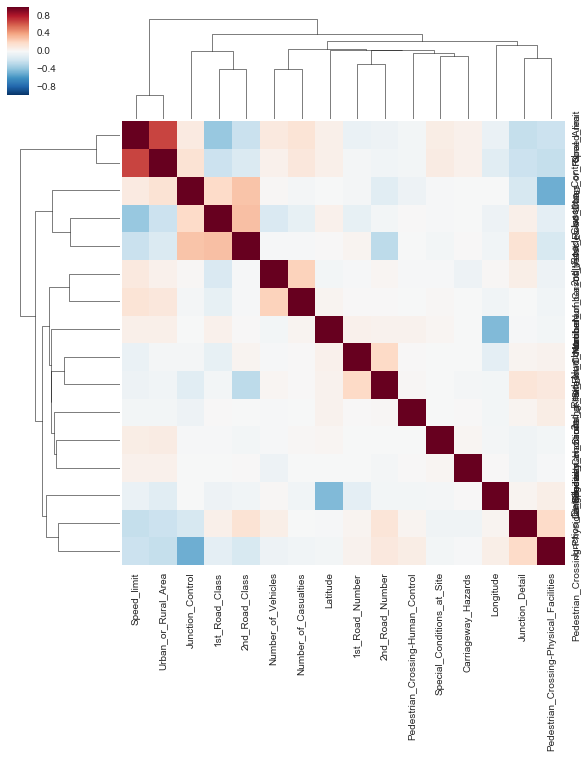

In [129]:
corrmat = accFilt.corr()

# draw a clustered heatmap using seaborn
sns.clustermap(corrmat, square=True)

In [67]:
result = accFilt.groupby([accFilt.Weather_Conditions, accFilt.Light_Conditions]).agg({ 'Weather_Conditions': {'Number of Accidents': 'count'}})
result.columns = result.columns.droplevel(0)
result
g = result['Number of Accidents'].groupby(level=0, group_keys=False)
result.sort(['Number of Accidents'], ascending=False)
res = g.apply(lambda x: x.order(ascending=False))
res

Weather_Conditions     Light_Conditions           
Fine + high winds      Daylight                        1037
                       Darkness - lights lit            372
                       Darkness - no lighting           137
                       Darkness - lighting unknown       17
                       Darkness - lights unlit           12
Fine no high winds     Daylight                       92198
                       Darkness - lights lit          20167
                       Darkness - no lighting          4777
                       Darkness - lighting unknown     1104
                       Darkness - lights unlit          633
Fog or mist            Daylight                         370
                       Darkness - no lighting           179
                       Darkness - lights lit            174
                       Darkness - lighting unknown       19
                       Darkness - lights unlit           11
Other                  Daylight                  

In [80]:
result = accFilt.groupby([accFilt.Weather_Conditions, accFilt.Light_Conditions]).agg({ 'Weather_Conditions': {'Number of Accidents': 'count'}})
result.columns = result.columns.droplevel(0)

g = result['Number of Accidents'].groupby(level=0, group_keys=False)
res = g.apply(lambda x: x.order(ascending=False))
res

Weather_Conditions     Light_Conditions           
Fine + high winds      Daylight                        1037
                       Darkness - lights lit            372
                       Darkness - no lighting           137
                       Darkness - lighting unknown       17
                       Darkness - lights unlit           12
Fine no high winds     Daylight                       92198
                       Darkness - lights lit          20167
                       Darkness - no lighting          4777
                       Darkness - lighting unknown     1104
                       Darkness - lights unlit          633
Fog or mist            Daylight                         370
                       Darkness - no lighting           179
                       Darkness - lights lit            174
                       Darkness - lighting unknown       19
                       Darkness - lights unlit           11
Other                  Daylight                  

In [90]:
result.sort(['Number of Accidents'], ascending=False)

Number of Accidents
Weather_Conditions    Light_Conditions                                
Fine no high winds    Daylight                                   92198
                      Darkness - lights lit                      20167
Raining no high winds Daylight                                   10255
                      Darkness - lights lit                       5664
Fine no high winds    Darkness - no lighting                      4777
Unknown               Daylight                                    1626
Other                 Daylight                                    1387
Raining no high winds Darkness - no lighting                      1375
Fine no high winds    Darkness - lighting unknown                 1104
Raining + high winds  Daylight                                    1057
Fine + high winds     Daylight                                    1037
Raining + high winds  Darkness - lights lit                        867
Other                 Darkness - lights lit                        650
Fine no high winds    Darkness - lights unlit                      633
Unknown               Darkness - lights lit                        461
Fine + high winds     Darkness - lights lit                        372
Fog or mist           Daylight                                     370
Raining + high winds  Darkness - no lighting                       352
Unknown               Darkness - lighting unknown                  304
Other                 Darkness - no lighting                       239
Raining no high winds Darkness - lighting unknown                  219
Fog or mist           Darkness - no lighting                       179
                      Darkness - lights lit                        174
Raining no high winds Darkness - lights unlit                      152
Fine + high winds     Darkness - no lighting                       137
Snowing no high winds Daylight                                     101
                      Darkness - lights lit                         80
Unknown               Darkness - no lighting                        76
Snowing no high winds Darkness - no lighting                        40
Snowing + high winds  Daylight                                      40
Raining + high winds  Darkness - lighting unknown                   32
Other                 Darkness - lighting unknown                   32
Raining + high winds  Darkness - lights unlit                       25
Other                 Darkness - lights unlit                       24
Snowing + high winds  Darkness - no lighting                        24
Fog or mist           Darkness - lighting unknown                   19
Fine + high winds     Darkness - lighting unknown                   17
Snowing + high winds  Darkness - lights lit                         14
Unknown               Darkness - lights unlit                       13
Fine + high winds     Darkness - lights unlit                       12
Fog or mist           Darkness - lights unlit                       11
Snowing no high winds Darkness - lighting unknown                    4
                      Darkness - lights unlit                        2

In [113]:
result = accFilt.groupby([accFilt.Weather_Conditions, accFilt.Light_Conditions]).agg({ 'Number_of_Casualties': {'Avg number of casualties': 'mean'}})
result.columns = result.columns.droplevel(0)
result.fillna(0, inplace=True)
result.sort('Avg number of casualties', ascending=False)

,,Avg number of casualties
Weather_Conditions,Light_Conditions,
Fog or mist,Darkness - lights unlit,1.727273
Snowing + high winds,Daylight,1.675000
Fine + high winds,Darkness - lighting unknown,1.647059
Snowing + high winds,Darkness - no lighting,1.583333
Fog or mist,Darkness - no lighting,1.558659
Fine + high winds,Darkness - no lighting,1.518248
Fine no high winds,Darkness - no lighting,1.514968
Raining + high winds,Darkness - no lighting,1.508523
Snowing no high winds,Darkness - lighting unknown,1.500000


In [114]:
result = accFilt.where(accFilt.Accident_Severity == 'Fatal').groupby([accFilt.Weather_Conditions, accFilt.Light_Conditions]).agg({ 'Number_of_Casualties': {'Avg number of casualties': 'mean'}})
result.columns = result.columns.droplevel(0)
result.fillna(0, inplace=True)
result.sort('Avg number of casualties', ascending=False)

,,Avg number of casualties
Weather_Conditions,Light_Conditions,
Unknown,Darkness - lighting unknown,5.000000
Fog or mist,Darkness - lights lit,4.666667
Raining no high winds,Darkness - lighting unknown,4.000000
Fine + high winds,Darkness - lights lit,2.500000
Raining + high winds,Darkness - no lighting,2.166667
Other,Daylight,2.000000
Snowing no high winds,Daylight,2.000000
Raining + high winds,Darkness - lights unlit,2.000000
Fine + high winds,Darkness - no lighting,2.000000


In [118]:
result = accFilt.groupby([accFilt.Weather_Conditions]).agg({ 'Number_of_Casualties': {'Avg number of casualties': 'mean'}})
result.columns = result.columns.droplevel(0)
result.fillna(0, inplace=True)
result.sort('Avg number of casualties', ascending=False)

,Avg number of casualties
Weather_Conditions,
Snowing + high winds,1.602564
Fog or mist,1.455511
Snowing no high winds,1.418502
Fine + high winds,1.377143
Raining + high winds,1.353622
Other,1.348628
Raining no high winds,1.342881
Fine no high winds,1.326963
Unknown,1.206452


In [119]:
result = accFilt.groupby([accFilt.Light_Conditions]).agg({ 'Number_of_Casualties': {'Avg number of casualties': 'mean'}})
result.columns = result.columns.droplevel(0)
result.fillna(0, inplace=True)
result.sort('Avg number of casualties', ascending=False)

,Avg number of casualties
Light_Conditions,
Darkness - no lighting,1.501459
Darkness - lights unlit,1.383028
Daylight,1.322492
Darkness - lights lit,1.314809
Darkness - lighting unknown,1.232813


In [120]:
result = accFilt.groupby([accFilt.Road_Surface_Conditions]).agg({ 'Number_of_Casualties': {'Avg number of casualties': 'mean'}})
result.columns = result.columns.droplevel(0)
result.fillna(0, inplace=True)
result.sort('Avg number of casualties', ascending=False)

,Avg number of casualties
Road_Surface_Conditions,
Snow,1.485437
Flood over 3cm. deep,1.385496
Wet or damp,1.355908
Frost or ice,1.328605
Dry,1.318009


In [121]:
result = accFilt.groupby([accFilt.Road_Type]).agg({ 'Number_of_Casualties': {'Avg number of casualties': 'mean'}})
result.columns = result.columns.droplevel(0)
result.fillna(0, inplace=True)
result.sort('Avg number of casualties', ascending=False)

,Avg number of casualties
Road_Type,
Dual carriageway,1.477069
Slip road,1.396239
Single carriageway,1.314003
Roundabout,1.234582
One way street,1.171039
Unknown,1.169960


In [122]:
result = accFilt.groupby([accFilt.Road_Type]).agg({ 'Number_of_Casualties': {'Number of accidents': 'count'}})
result.columns = result.columns.droplevel(0)
result.fillna(0, inplace=True)
result.sort('Number of accidents', ascending=False)

,Number of accidents
Road_Type,
Single carriageway,110187
Dual carriageway,20823
Roundabout,10329
One way street,2935
Slip road,1542
Unknown,506
